## Inner join
### What column to merge on?
Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called taxi_owners, with info about the taxi cab company owners, and one is called taxi_veh, with info about each taxi cab vehicle. Both the taxi_owners and taxi_veh tables have been loaded for you and you can explore them in the IPython shell.

Choose the column you would use to merge the two tables on using the .merge() method.

A)on='rid'

<strong>B)on='vid'</strong>

C)on='year'

D)on='zip'

### Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.
<br>
<strong>Our datasets have the type of '.p' extension (Pascal file) which means 'pickle' file. Therefore, we'll need to "import pickle as pkl" and do necessary things. </strong>

In [39]:
import pickle as pkl

#Converting .pkl or .p extension into the .csv extension
import pandas as pd
with open("taxi_owners.p", "rb") as f:
    object = pkl.load(f)
    
taxi_owners = pd.DataFrame(object)
taxi_owners.to_csv(r'taxi_owners.csv')
##############################################
with open("taxi_vehicles.p", "rb") as f:
    object = pkl.load(f)
    
taxi_veh = pd.DataFrame(object)
taxi_veh.to_csv(r'taxi_veh.csv')



In [40]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on = "vid")

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [41]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes = ("_own","_veh"))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [42]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the wards and census tables start with 50 rows.

In [43]:
with open("ward.p", "rb") as f:
    object = pkl.load(f)
    
wards = pd.DataFrame(object)
wards.to_csv(r'wards.csv')
#################################
with open("census.p", "rb") as f:
    object = pkl.load(f)
    
census = pd.DataFrame(object)
census.to_csv(r'census.csv')


In [44]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on = "ward")
print(wards_census)

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)


   ward                   alderman                          address_x  zip_x  \
0     1         Proco "Joe" Moreno          2058 NORTH WESTERN AVENUE  60647   
1     2              Brian Hopkins         1400 NORTH  ASHLAND AVENUE  60622   
2     3                 Pat Dowell            5046 SOUTH STATE STREET  60609   
3     4           William D. Burns    435 EAST 35TH STREET, 1ST FLOOR  60616   
4     5         Leslie A. Hairston              2325 EAST 71ST STREET  60649   
5     6         Roderick T. Sawyer   8001 S. MARTIN LUTHER KING DRIVE  60619   
6     7        Gregory I. Mitchell              2249 EAST 95TH STREET  60617   
7     8         Michelle A. Harris    8539 SOUTH COTTAGE GROVE AVENUE  60619   
8     9           Anthony A. Beale                34 EAST 112TH PLACE  60628   
9    10      Susan Sadlowski Garza           10500 SOUTH EWING AVENUE  60617   
10   11     Patrick Daley Thompson          3659 SOUTH HALSTED STREET  60609   
11   12            George Cardenas      

wards_census table shape: (50, 9)


In [45]:
wards_altered = pd.read_csv("wards_altered.csv")


In [46]:
# Print the first few rows of the wards_altered table to view the change 
print(wards_altered['ward'].head())
print(census["ward"].head())

# We need to convert int64 to object otherwise it gives an error (can not be converted from int64 to object)
wards_altered["ward"] = wards_altered["ward"].apply(lambda x: str(x))
print(wards_altered["ward"].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on = "ward")

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

0    61
1     2
2     3
3     4
4     5
Name: ward, dtype: int64
0    1
1    2
2    3
3    4
4    5
Name: ward, dtype: object
0    61
1     2
2     3
3     4
4     5
Name: ward, dtype: object
wards_altered_census table shape: (49, 10)


In [47]:
census_altered = pd.read_csv("census_altered.csv")

In [48]:
# Print the first few rows of the census_altered table to view the change 
print(census_altered['ward'].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on = "ward")

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)
print(wards_census_altered.columns)

0    None
1       2
2       3
3       4
4       5
Name: ward, dtype: object
wards_census_altered table shape: (49, 10)
Index(['ward', 'alderman', 'address_x', 'zip_x', 'Unnamed: 0', 'pop_2000',
       'pop_2010', 'change', 'address_y', 'zip_y'],
      dtype='object')


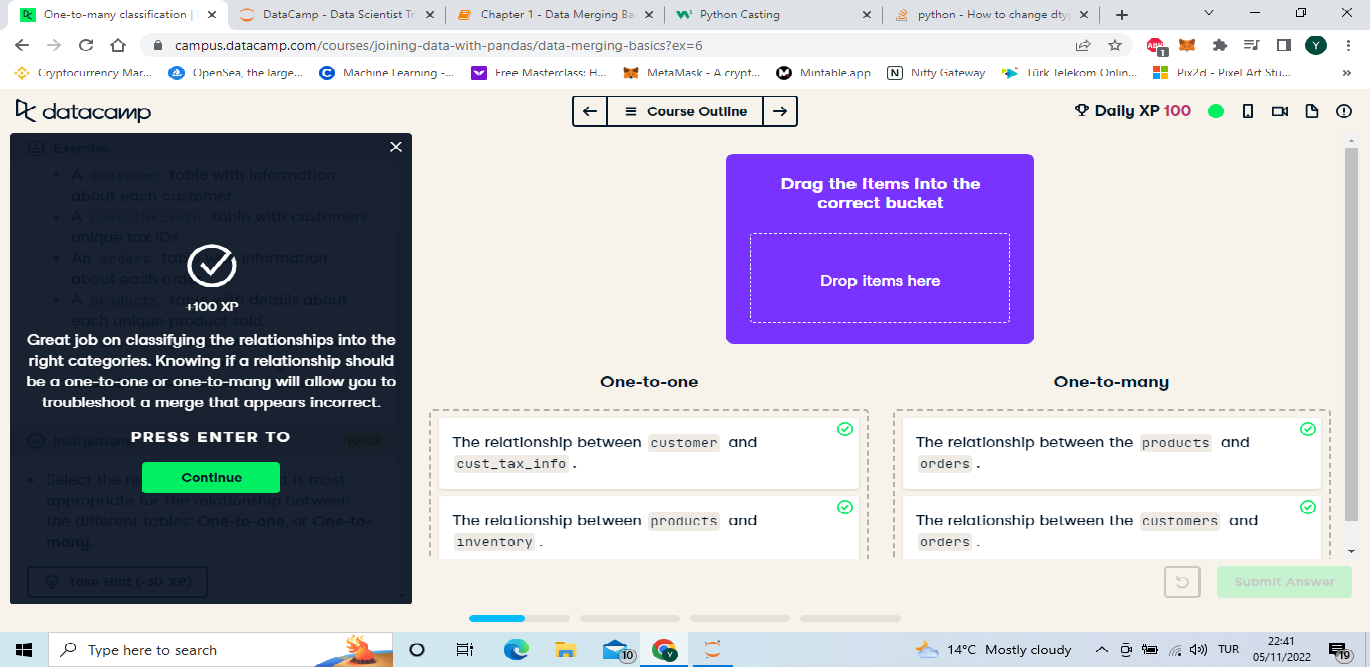

### One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [49]:
with open("licenses.p", "rb") as f:
    object = pkl.load(f)
    
licenses = pd.DataFrame(object)
licenses.to_csv(r'licenses.csv')

with open("business_owners.p", "rb") as f:
    object = pkl.load(f)
    
biz_owners = pd.DataFrame(object)
biz_owners.to_csv(r'biz_owners.csv')

In [50]:
licenses

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613
...,...,...,...,...,...,...
9995,8634,10,NaN,J M V CORP,2717 E 95TH ST,60617
9996,86350,42,708,AMERICASH LOANS LLC,103 N WELLS ST 1ST,60606
9997,86352,23,775,MC DONALD'S,6720 W ARCHER AVE 1,60638
9998,86355,43,638,VOSGES HAUT-CHOCOLAT,951 W ARMITAGE AVE 1,60614


In [51]:
biz_owners

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT
...,...,...,...,...
21347,9513,THOMAS,MAHLUM,SECRETARY
21348,9563,GUADALUPE,PEREZ,PRESIDENT
21349,9638,STEVEN,JENSEN,VICE PRESIDENT
21350,9922,MANUEL,SALAZAR,SECRETARY


In [52]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on = "account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values(by = ["account"], ascending = False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df)

                    account
title                      
PRESIDENT              6259
SECRETARY              5205
SOLE PROPRIETOR        1658
OTHER                  1200
VICE PRESIDENT          970
MEMBER                  884
MANAGING MEMBER         878
SHAREHOLDER             590
PARTNER                 451
TREASURER               447
INDIVIDUAL              268
DIRECTOR                146
MANAGER                 134
ASST. SECRETARY         111
CEO                     110
PRINCIPAL OFFICER        63
SPOUSE                   34
LIMITED PARTNER          26
GENERAL PARTNER          21
NOT APPLICABLE           11
EXECUTIVE DIRECTOR       10
TRUSTEE                   6
BENEFICIARY               4


### Merging multiple dataFrames
#### Total riders in a month

Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

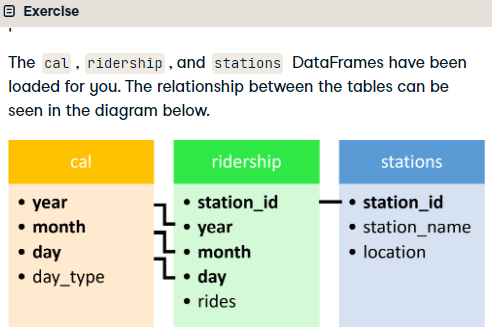

In [53]:
with open("cta_calendar.p", "rb") as f:
    object = pkl.load(f)
    
cal = pd.DataFrame(object)
cal.to_csv(r'cal.csv')

with open("cta_ridership.p", "rb") as f:
    object = pkl.load(f)
    
ridership = pd.DataFrame(object)
ridership.to_csv(r'ridership.csv')

with open("stations.p", "rb") as f:
    object = pkl.load(f)
    
stations = pd.DataFrame(object)
stations.to_csv(r'stations.csv')


In [54]:
cta_calendar.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [55]:
cta_ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [56]:
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [59]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on = ["year", "month","day"])
ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


In [61]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on = "station_id")
ridership_cal_stations

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"
...,...,...,...,...,...,...,...,...
3280,41660,2019,12,27,13898,Weekday,Lake/State,"(41.884809, -87.627813)"
3281,41660,2019,12,28,9485,Saturday,Lake/State,"(41.884809, -87.627813)"
3282,41660,2019,12,29,7581,Sunday/Holiday,Lake/State,"(41.884809, -87.627813)"
3283,41660,2019,12,30,15332,Weekday,Lake/State,"(41.884809, -87.627813)"


In [71]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


### Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

In [72]:
with open("zip_demo.p", "rb") as f:
    object = pkl.load(f)
    
zip_demo = pd.DataFrame(object)
zip_demo.to_csv(r'zip_demo.csv')


In [73]:
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [74]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [76]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [79]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = "zip") \
            			.merge(wards, on = "ward")

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby(["alderman"]).agg({'income':'median'}).head())

                       income
alderman                     
Ameya Pawar             66246
Anthony A. Beale        38206
Anthony V. Napolitano   82226
Ariel E. Reyboras       41307
Brendan Reilly         110215


### One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

In [80]:
with open("land_use.p", "rb") as f:
    object = pkl.load(f)
    
land_use = pd.DataFrame(object)
land_use.to_csv(r'land_use.csv')

In [85]:
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [86]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [87]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [84]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on = "ward") \
                    .merge(licenses, on = "ward", suffixes = ("_cen", "_lic"))
print(land_cen_lic.head())

  ward  residential  commercial  industrial  vacant  other  pop_2000  \
0    1           41           9           2       2     46     52951   
1    1           41           9           2       2     46     52951   
2    1           41           9           2       2     46     52951   
3    1           41           9           2       2     46     52951   
4    1           41           9           2       2     46     52951   

   pop_2010 change                  address_cen zip_cen account  aid  \
0     56149     6%  2765 WEST SAINT MARY STREET   60647   12024  NaN   
1     56149     6%  2765 WEST SAINT MARY STREET   60647   14446  743   
2     56149     6%  2765 WEST SAINT MARY STREET   60647   14624  775   
3     56149     6%  2765 WEST SAINT MARY STREET   60647   14987  NaN   
4     56149     6%  2765 WEST SAINT MARY STREET   60647   15642  814   

               business              address_lic zip_lic  
0   DIGILOG ELECTRONICS       1038 N ASHLAND AVE   60622  
1      EMPTY BOT

In [88]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(["ward","pop_2010","vacant"], 
                                   as_index=False).agg({'account':'count'})
print(pop_vac_lic.head())

  ward  pop_2010  vacant  account
0    1     56149       2      253
1   10     51535      14      130
2   11     51497       5      201
3   12     52235       4      255
4   13     53722       1      101


In [90]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = "zip") \
            			.merge(wards, on = "ward")

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby(["alderman"]).agg({'income':'median'}).head())

                       income
alderman                     
Ameya Pawar             66246
Anthony A. Beale        38206
Anthony V. Napolitano   82226
Ariel E. Reyboras       41307
Brendan Reilly         110215


In [91]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(["vacant","account","pop_2010"] ,ascending = [False, True, True]) 
                                             

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156
